In [6]:
import pandas as pd
import numpy as np

In [8]:
dataset=pd.read_csv("Market_Basket_Optimisation.csv")

In [10]:
print(dataset)

              shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0             NaN              NaN  NaN 

In [12]:
# lets know the column names from the dataset
colname = dataset.columns

# print the colname along its dtype
print("The column name and its datatype:")
for x in colname:
    print(f"{x}-->{dataset[x].dtype}")


The column name and its datatype:
shrimp-->object
almonds-->object
avocado-->object
vegetables mix-->object
green grapes-->object
whole weat flour-->object
yams-->object
cottage cheese-->object
energy drink-->object
tomato juice-->object
low fat yogurt-->object
green tea-->object
honey-->object
salad-->object
mineral water-->object
salmon-->object
antioxydant juice-->object
frozen smoothie-->object
spinach-->object
olive oil-->float64


In [14]:
 print("the last two column:",dataset.iloc[:,-2:])
print("using splicing method:",dataset[-1:-3:1])
df_slice = dataset.iloc[1:4, -1:-3] # Output: Rows 1-3, last two Columns
print(df_slice)
data=dataset.iloc[1:4,-2:] # this code will give the row 1,2,3 and also last two cols
print(data)

the last two column:      spinach  olive oil
0        NaN        NaN
1        NaN        NaN
2        NaN        NaN
3        NaN        NaN
4        NaN        NaN
...      ...        ...
7495     NaN        NaN
7496     NaN        NaN
7497     NaN        NaN
7498     NaN        NaN
7499     NaN        NaN

[7500 rows x 2 columns]
using splicing method: Empty DataFrame
Columns: [shrimp, almonds, avocado, vegetables mix, green grapes, whole weat flour, yams, cottage cheese, energy drink, tomato juice, low fat yogurt, green tea, honey, salad, mineral water, salmon, antioxydant juice, frozen smoothie, spinach, olive oil]
Index: []
Empty DataFrame
Columns: []
Index: [1, 2, 3]
  spinach  olive oil
1     NaN        NaN
2     NaN        NaN
3     NaN        NaN


In [16]:
# using tail and head
dataset.tail(4)
dataset.head(6)
dataset.sample(6)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
4116,ground beef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4833,escalope,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6873,parmesan cheese,avocado,milk,energy bar,salmon,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7168,spaghetti,eggs,eggplant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7331,burgers,eggs,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5753,turkey,frozen vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# let know the nan value column name from the dataset

In [19]:
dataset.isnull().sum() # the count is huge -->let convert the df into binary Matrix

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

## Student A 
## usage of the Binary Matrix
### used to represents the absence of missing value in terms of 0 and 1
### Mark a 1 if the item is present in the transaction and 0 if it is not.

In [22]:
dataset = dataset.fillna('')  # Replacing NaN with empty str
print(dataset)

              shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs                     
1            chutney                                                     
2             turkey            avocado                                  
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                                                     
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread                     
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                                                     
7498        escalope          green tea                                  
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0                                       

In [24]:
#convert the dataset contains str into stack of row
#pd.get_dummies(): Converts categorical variables into dummy/indicator variables.
stackrow=pd.get_dummies(dataset.astype(str).stack())
#print(stackrow)
final_Matrix=stackrow.groupby(level=0).sum()
print(final_Matrix)

           asparagus  almonds  antioxydant juice  asparagus  avocado  \
0     17           0        0                  0          0        0   
1     19           0        0                  0          0        0   
2     18           0        0                  0          0        1   
3     15           0        0                  0          0        0   
4     19           0        0                  0          0        0   
...   ..         ...      ...                ...        ...      ...   
7495  17           0        0                  0          0        0   
7496  14           0        0                  0          0        0   
7497  19           0        0                  0          0        0   
7498  18           0        0                  0          0        0   
7499  16           0        0                  0          0        0   

      babies food  bacon  barbecue sauce  black tea  ...  turkey  \
0               0      0               0          0  ...       0   

## Student B:

In [58]:
# Calculate the total count of each item
item_counts = final_Matrix.sum()
#c=final_Matrix.sum()
#print(c)
# Display product popularity in descending order
print(item_counts.sort_values(ascending=False))

final_Matrix =final_Matrix.astype(bool).astype(int)

print(final_Matrix.dtypes)

                 7500
mineral water    1787
eggs             1348
spaghetti        1306
french fries     1282
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Length: 121, dtype: int64
                     int32
 asparagus           int32
almonds              int32
antioxydant juice    int32
asparagus            int32
                     ...  
whole wheat pasta    int32
whole wheat rice     int32
yams                 int32
yogurt cake          int32
zucchini             int32
Length: 121, dtype: object


In [96]:
from itertools import combinations
import pandas as pd

# Define function to count item pairs
def count_item_pairs(final_Matrix):
    item_counts = {}
    for _, row in final_Matrix.iterrows():
        items = row.index[row == 1].tolist()
        pairs = combinations(items, 2)
        for pair in pairs:
            if pair not in item_counts:
                item_counts[pair] = 0
            item_counts[pair] += 1
    return item_counts

# Calculate item pairs
item_pairs = count_item_pairs(final_Matrix)

# Convert to DataFrame for easier viewing
item_pairs_df = pd.DataFrame(list(item_pairs.items()), columns=['Item Pair', 'Count'])

# Display prevalent item pairs
print(item_pairs_df.sort_values(by='Count', ascending=False))


                             Item Pair  Count
13                   (, mineral water)   1787
1                             (, eggs)   1348
36                       (, spaghetti)   1306
26                    (, french fries)   1282
60                       (, chocolate)   1229
...                                ...    ...
1723                      (corn, soda)      1
4675  (antioxydant juice, cooking oil)      1
4672    (tomato sauce, vegetables mix)      1
4671         (energy drink, flax seed)      1
5675             (dessert wine, pasta)      1

[5676 rows x 2 columns]


### association rule mining.

In [62]:
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")
# let find frequent itemsets using the Apriori algorithm
fqitemsets = apriori(final_Matrix, min_support=0.02, use_colnames=True)

#get the rule association
rules = association_rules(fqitemsets, metric='confidence', min_threshold=0.6)

# Display association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                           antecedents consequents   support  confidence  lift
0                            (almonds)          ()  0.020267         1.0   1.0
1                            (avocado)          ()  0.033200         1.0   1.0
2                           (brownies)          ()  0.033733         1.0   1.0
3                            (burgers)          ()  0.087200         1.0   1.0
4                             (butter)          ()  0.030133         1.0   1.0
..                                 ...         ...       ...         ...   ...
99   (mineral water, whole wheat rice)          ()  0.020133         1.0   1.0
100             (olive oil, spaghetti)          ()  0.022933         1.0   1.0
101              (pancakes, spaghetti)          ()  0.025200         1.0   1.0
102                (shrimp, spaghetti)          ()  0.021200         1.0   1.0
103              (tomatoes, spaghetti)          ()  0.020933         1.0   1.0

[104 rows x 5 columns]


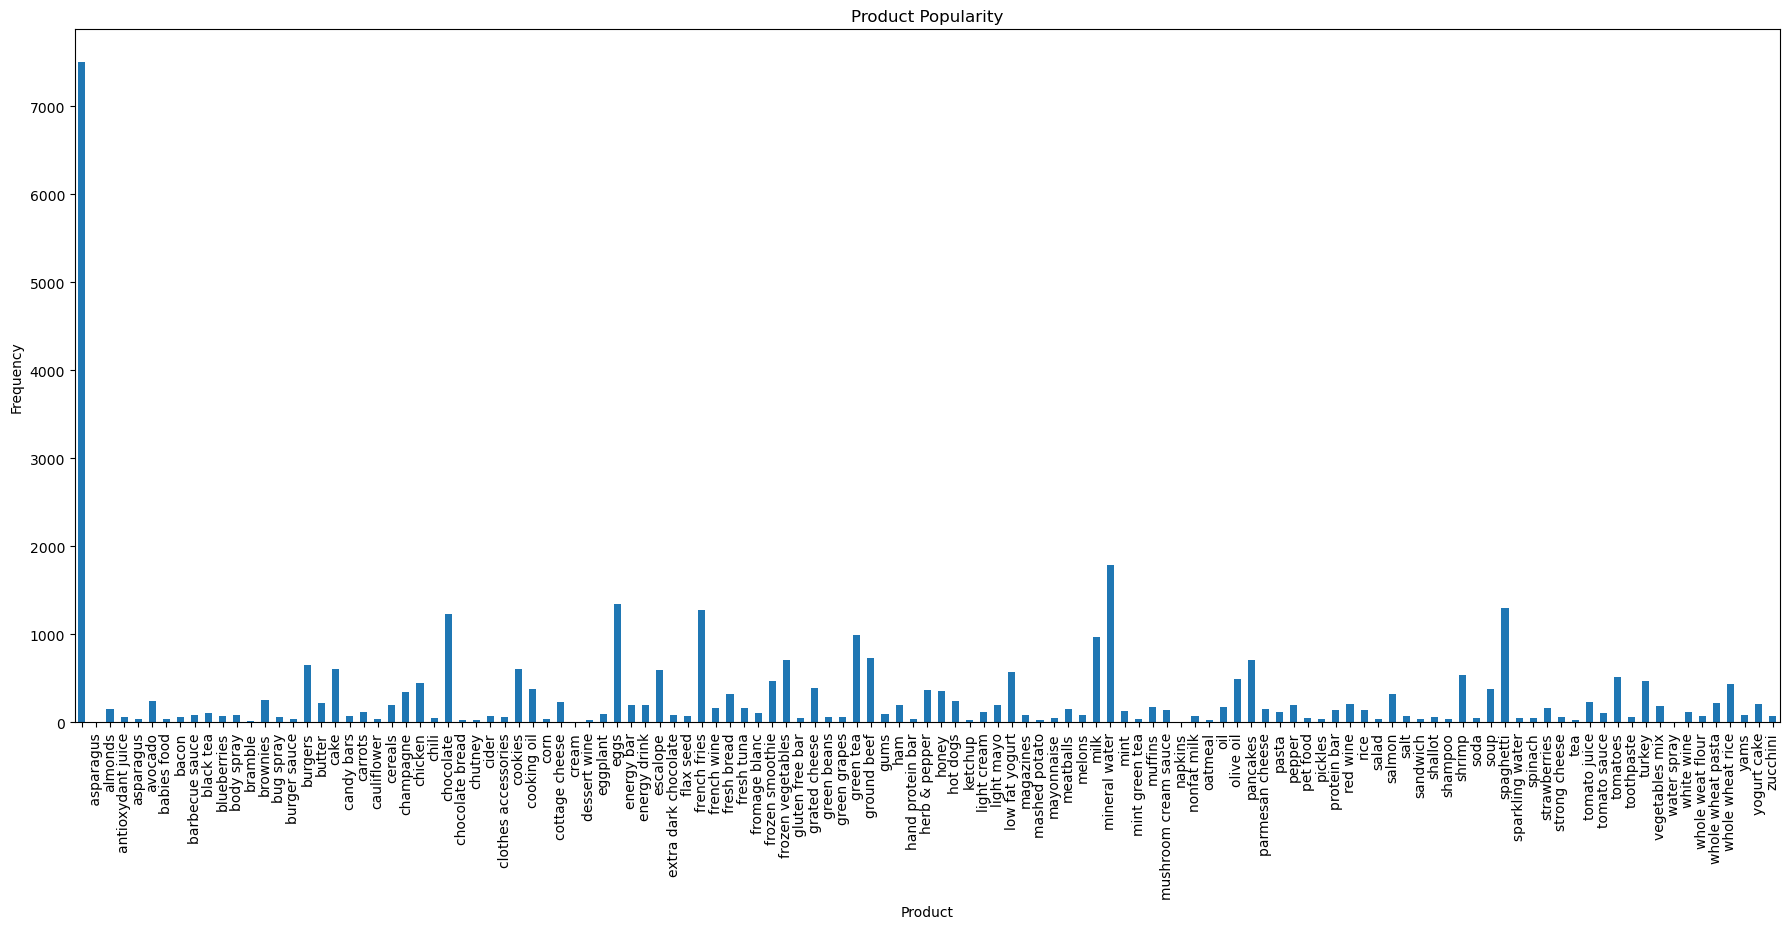

In [72]:
import matplotlib.pyplot as plt

# count of the frequency of each prod
prod_popularity =final_Matrix.sum()

#bar chart
plt.figure(figsize=(22, 9))
prod_popularity.plot(kind='bar')
plt.title('Product Popularity')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x1000 with 0 Axes>

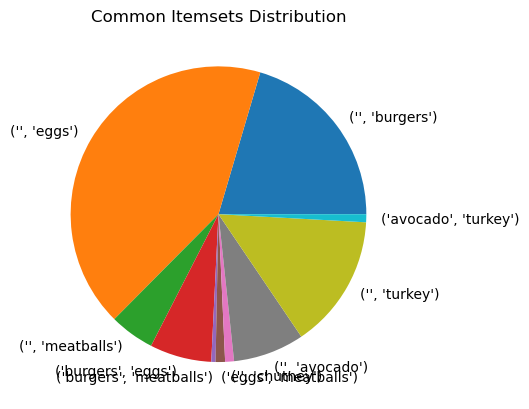

In [106]:
# lets find frequent item pairs
item_pairs = count_item_pairs(final_Matrix)

# item pairs --> DataFrame
item_pairs_df = pd.DataFrame(list(item_pairs.items()), columns=['Item Pair', 'Count'])

# pie chart
plt.figure(figsize=(10, 10))
item_pairs_df.head(10).plot.pie(y='Count', labels=item_pairs_df.head(10)['Item Pair'].astype(str), legend=False)
plt.title('Common Itemsets Distribution')
plt.ylabel('')
plt.show()


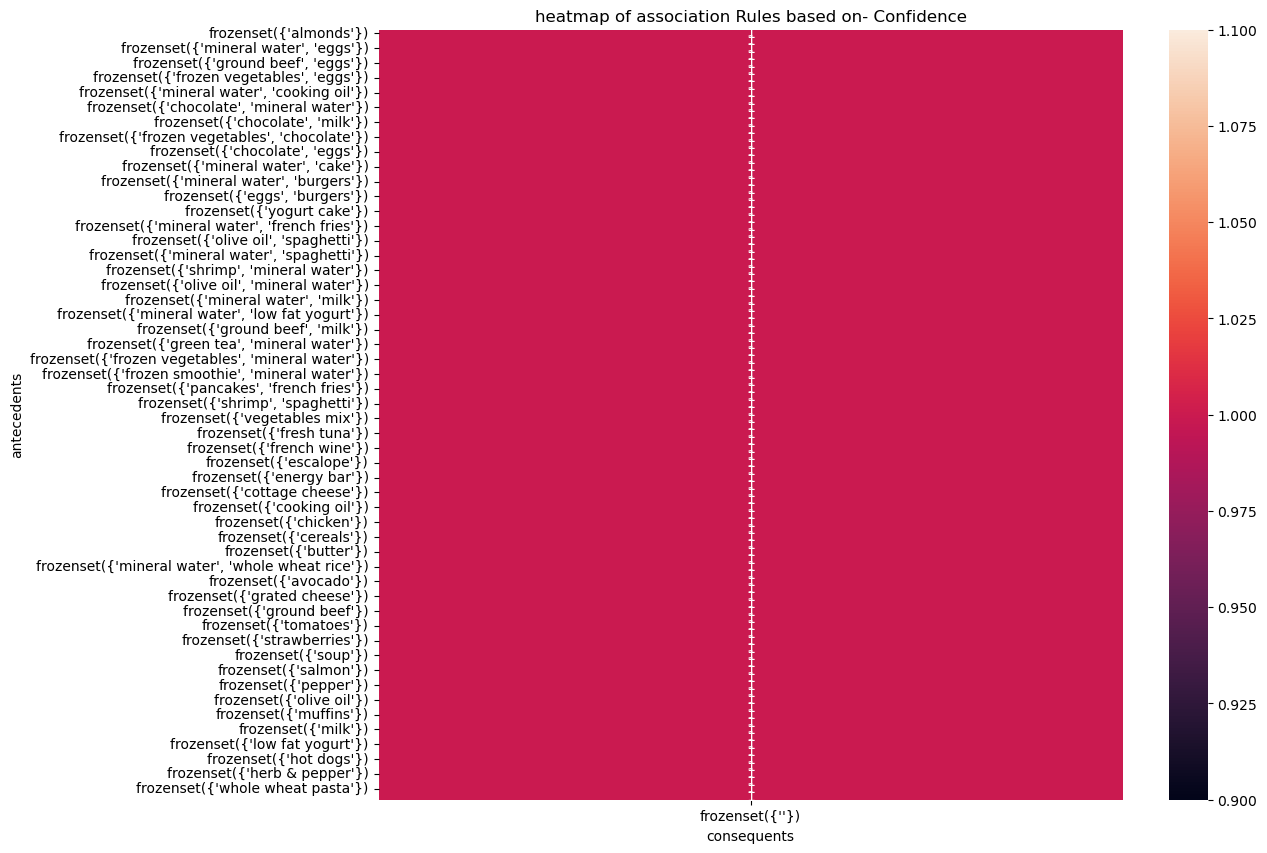

In [108]:
import seaborn as sns


rules= rules.pivot_table(index='antecedents', columns='consequents', values='confidence', fill_value=0)
plt.figure(figsize=(12, 10))
sns.heatmap(rules, annot=True)
plt.title('heatmap of association Rules based on- Confidence')
plt.xlabel('consequents')
plt.ylabel('antecedents')
plt.show()
